<a href="https://colab.research.google.com/github/yusufghifari29/Pemrograman_Python/blob/main/Kodingan%20Image%20Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/MyDrive/Colab Notebooks/DATASET DAUN

/content/drive/MyDrive/Colab Notebooks/DATASET DAUN


In [ ]:
ls

 Train/  'Validasi ade'/


In [ ]:
# import the necessary packages

from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os

In [ ]:
# grab all image paths in the input dataset directory, then initialize
# our list of images and corresponding class labels
print("[INFO] loading images...")
imagePaths = paths.list_images('Train')
data = []
labels = []

[INFO] loading images...


In [ ]:
# loop over our input images
for imagePath in imagePaths:
	# load the input image from disk, resize it to 64x64 pixels, scale
	# the pixel intensities to the range [0, 1], and then update our
	# images list
	image = Image.open(imagePath)
  #preprocessing
	image = np.array(image.resize((224, 224))) / 255.0 #normalisasi
	data.append(image)

	# extract the class label from the file path and update the
	# labels list
	label = imagePath.split(os.path.sep)[-2]
	labels.append(label)

In [ ]:
print(labels)

['Adenocarcinomas Colon', 'Adenocarcinomas Colon', 'Adenocarcinomas Colon', 'Adenocarcinomas Colon', 'Adenocarcinomas Colon', 'Adenocarcinomas Colon', 'Adenocarcinomas Colon', 'Adenocarcinomas Colon', 'Adenocarcinomas Colon', 'Adenocarcinomas Colon', 'Adenocarcinomas Colon', 'Adenocarcinomas Colon', 'Adenocarcinomas Colon', 'Adenocarcinomas Colon', 'Adenocarcinomas Colon', 'Adenocarcinomas Colon', 'Adenocarcinomas Colon', 'Adenocarcinomas Colon', 'Adenocarcinomas Colon', 'Adenocarcinomas Colon', 'Adenocarcinomas Colon', 'Adenocarcinomas Colon', 'Adenocarcinomas Colon', 'Adenocarcinomas Colon', 'Adenocarcinomas Colon', 'Adenocarcinomas Colon', 'Adenocarcinomas Colon', 'Adenocarcinomas Colon', 'Adenocarcinomas Colon', 'Adenocarcinomas Colon', 'Adenocarcinomas Colon', 'Adenocarcinomas Colon', 'Adenocarcinomas Colon', 'Adenocarcinomas Colon', 'Adenocarcinomas Colon', 'Adenocarcinomas Colon', 'Adenocarcinomas Colon', 'Adenocarcinomas Colon', 'Adenocarcinomas Colon', 'Adenocarcinomas Colon',

In [ ]:
# encode the labels, converting them from strings to integers
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [ ]:
print(labels)

[[1 0 0]
 [1 0 0]
 [1 0 0]
 ...
 [0 0 1]
 [0 0 1]
 [0 0 1]]


In [ ]:
# perform a training and testing split, using 75% of the data for
# training and 25% for evaluation
(trainX, testX, trainY, testY) = train_test_split(np.array(data),	np.array(labels), test_size=0.25, shuffle=True)
print(trainX.shape)
print(testX.shape)
print(trainY.shape)
print(testY.shape)

(1500, 224, 224, 3)
(500, 224, 224, 3)
(1500, 3)
(500, 3)


In [ ]:
from keras.applications.mobilenet import MobileNet
from keras.applications.resnet import ResNet50
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import Model
from keras.layers import GlobalAveragePooling2D, BatchNormalization, Dropout

base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224,224,3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
x = BatchNormalization()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = BatchNormalization()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
out = Dense(2, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=out)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

In [ ]:
es = EarlyStopping(monitor='val_loss',
                   patience=5,
                   mode='auto',
                   restore_best_weights=True)
checkpoint = ModelCheckpoint('best_weight_scene_mobileNet.h5',
                             monitor='val_loss',
                             verbose=1,
                             save_best_only=True,
                             mode='auto',)

In [ ]:
#masukan model CNN 
from keras.layers import Convolution2D, MaxPooling2D
from keras.models import Sequential

model = Sequential()
model.add(Convolution2D(16, (3, 3), activation='relu', input_shape=(224,224,3)))
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2,2))
#fully connected layer
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 64)       0

In [ ]:
model2 = Sequential()
model2.add(Convolution2D(256, (3, 3), activation='relu', input_shape=(224,224,3)))
model2.add(MaxPooling2D(2,2))
model2.add(Convolution2D(512, (3, 3), activation='relu'))
model2.add(MaxPooling2D(2,2))
#fully connected layer
model2.add(Flatten())
model2.add(Dense(200, activation='relu'))
model2.add(Dense(250, activation='relu'))
model2.add(Dense(10, activation='softmax'))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 256)     7168      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 111, 111, 256)    0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 512)     1180160   
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 54, 54, 512)      0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1492992)           0         
                                                                 
 dense_7 (Dense)             (None, 200)              

In [ ]:
# train the model using the Adam optimizer
print("[INFO] training network...")
opt = Adam(learning_rate=1e-2, decay=1e-2)
model.compile(loss="categorical_crossentropy", optimizer='Adam', metrics=["accuracy"])

[INFO] training network...


In [ ]:
H = model.fit(trainX, trainY, validation_data=(testX, testY), steps_per_epoch=25, epochs=25, batch_size=30, shuffle=True)
# H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=50, batch_size=32, callbacks=[es, checkpoint])

Epoch 1/25
25/25 [==============================] - 13s 80ms/step - loss: 1.0228 - accuracy: 0.4413 - val_loss: 0.9871 - val_accuracy: 0.4880
Epoch 2/25
25/25 [==============================] - 1s 43ms/step - loss: 0.9642 - accuracy: 0.5227 - val_loss: 0.9747 - val_accuracy: 0.4880
Epoch 3/25
25/25 [==============================] - 1s 43ms/step - loss: 0.9709 - accuracy: 0.5013 - val_loss: 0.9808 - val_accuracy: 0.4880
Epoch 4/25
25/25 [==============================] - 1s 43ms/step - loss: 0.9908 - accuracy: 0.5067 - val_loss: 0.9714 - val_accuracy: 0.4880
Epoch 5/25
25/25 [==============================] - 1s 43ms/step - loss: 0.9771 - accuracy: 0.5213 - val_loss: 0.9712 - val_accuracy: 0.4880
Epoch 6/25
25/25 [==============================] - 1s 43ms/step - loss: 0.9904 - accuracy: 0.4867 - val_loss: 0.9671 - val_accuracy: 0.4880
Epoch 7/25
25/25 [==============================] - 1s 43ms/step - loss: 0.9388 - accuracy: 0.5160 - val_loss: 0.8918 - val_accuracy: 0.4880
Epoch 8/25
2

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


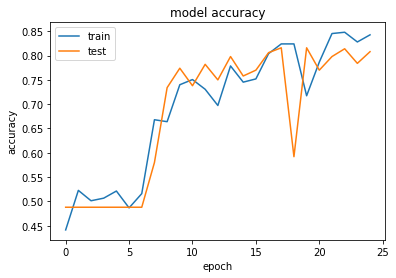

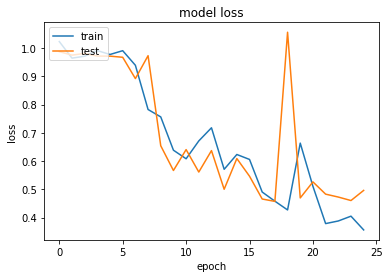

In [ ]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
                       precision    recall  f1-score   support

Adenocarcinomas Colon       1.00      0.87      0.93       244
               Polyps       0.67      0.98      0.80       194
             Polyps 2       0.33      0.02      0.03        62

             accuracy                           0.81       500
            macro avg       0.67      0.62      0.59       500
         weighted avg       0.79      0.81      0.77       500



In [ ]:
model.save('Validasi ade')

INFO:tensorflow:Assets written to: Validasi ade/assets


In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt
image1='/content/drive/MyDrive/Colab Notebooks/DATASET DAUN/Train/Polyps/colonn1.jpeg'

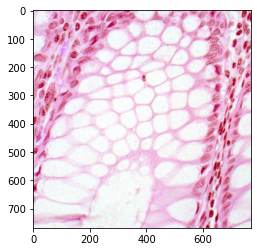

In [ ]:
img_array = cv.imread(image1)
plt.imshow(img_array)
plt.show()
# print(type(img_array))

In [ ]:
image_testing = Image.open('/content/drive/MyDrive/Colab Notebooks/DATASET DAUN/Train/Polyps/colonn1.jpeg')
image_testing = np.array(image_testing.resize((224, 224))) / 255.0
image_testing.shape

(224, 224, 3)

In [ ]:
image_testing = np.expand_dims(image_testing, axis=0)
print(image_testing.shape)

(1, 224, 224, 3)


In [ ]:
output = model.predict(image_testing, 1)
print(output)
print(lb.classes_[output.argmax(axis=1)])

[[0.00627044 0.834811   0.15891856]]
['Polyps']
